### 금융 시장의 수익률 (Finacial Market Return)
- 일반적으로 금융 시장을 분석하거나 머신러닝 모델을 구축할 때 price가 아닌 return을 활용하는 경우가 많다.
- 수익률을 통해 **복리계산**과 **연율화**(1년 간의 성장률)등을 위해 무수히 많은 반복 계산을 하게 되므로  
  (1 + return)으로 계산할 경우 **복잡**하고 번거로워진다.
- 기존 return에 log를 취해주면, 더 편한 계산이 가능해지지만 당연히 약간의 오차는 발생하게 된다.
- 약간의 오차를 감수하고 로그를 사용함으로써 얻는 이득이 훨씬 많고, 국내 주식에서의 상한선과 하한선은 -30% ~ 30% 제약까지 있기 때문에 일반적인 주가 움직임에 대해 오차가 극히 적다.
- 즉, 로그를 취하는 것은 정밀성보다 **편의성**을 높인 것으로 이해하면 된다.
- 수익률 단위가 분, 초, 밀리초 이하로 내려가야 정밀성에 차이가 많이 발생하지만, 실제 금융시장에서는  
  최소 하루 단위 이상으로 계산하기 때문에 오차가 거의 발생하지 않게 된다.
- 또한, return에 로그를 취하면 우측으로 치우친 확률 분포를 중심으로 재조정해주는 효과까지 있기 때문에 안쓸 이유가 없다.  
<sub>*log부터 취하고 시작하기</sub>

<img src="./images/log_return.png" width="700px">

<sub>*x축은 수익률을 뜻한다.  
*상한가, 하안가가 있기 때문에 -0.3과 +0.3으로 표기한다.</sub>

In [1]:
import yfinance as yf

# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 
           'SPY', '^SPX', '^VIX', 'EURUSD=X', '^XAU', 'GDX', 'GLD']
# AAPL = 애플, MSFT= 마이크로소프트, INTC = 인텔, AMZN = 아마존, GS = 미국은행
# SPY, ^SPX, ^VIX = 뉴욕 증시, ^SPX = 상위 오백개
# EURUSD=X = 유로 대 미국 달러 환율
# ^XAU = 금 현물, GDX = 금광 업체, GLD = 금 펀드

# 특정 주식 데이터 다운로드 후 단변량 시계열 데이터 프레임으로 변환 (소수점자리 까지 표기) 
f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-07,6.3584,6.5000,1.4318,43.4093,110.82,138.3345,13.4773,23.0116,87.5192,1141.6899,19.06,179.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,195.8700,181.2800,1.0882,34.7900,217.82,461.6800,30.7800,424.0100,534.6700,5354.0298,12.63,140.83
2024-06-06,194.4800,185.0000,1.0875,36.0100,219.43,458.1000,30.4200,424.5200,534.6600,5352.9600,12.58,145.38
2024-06-07,196.8900,184.3000,1.0894,33.5400,211.60,454.9100,30.7400,423.8500,534.0100,5346.9902,12.22,136.20


In [2]:
# 데이터 정보 출력
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3768 entries, 2010-01-01 to 2024-06-11
Freq: B
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      3633 non-null   float64
 1   AMZN      3633 non-null   float64
 2   EURUSD=X  3763 non-null   float64
 3   GDX       3633 non-null   float64
 4   GLD       3634 non-null   float64
 5   GS        3634 non-null   float64
 6   INTC      3634 non-null   float64
 7   MSFT      3634 non-null   float64
 8   SPY       3633 non-null   float64
 9   ^SPX      3634 non-null   float64
 10  ^VIX      3634 non-null   float64
 11  ^XAU      3633 non-null   float64
dtypes: float64(12)
memory usage: 382.7 KB


In [3]:
# # 참고 (csv 사용 시)
# # 인덱스를 원하는 컬럼으로 변경한 뒤, DatetimeIndex으로 변환
# pd.read_csv('path', index_col='날짜 컬럼명', parse_dates=True)

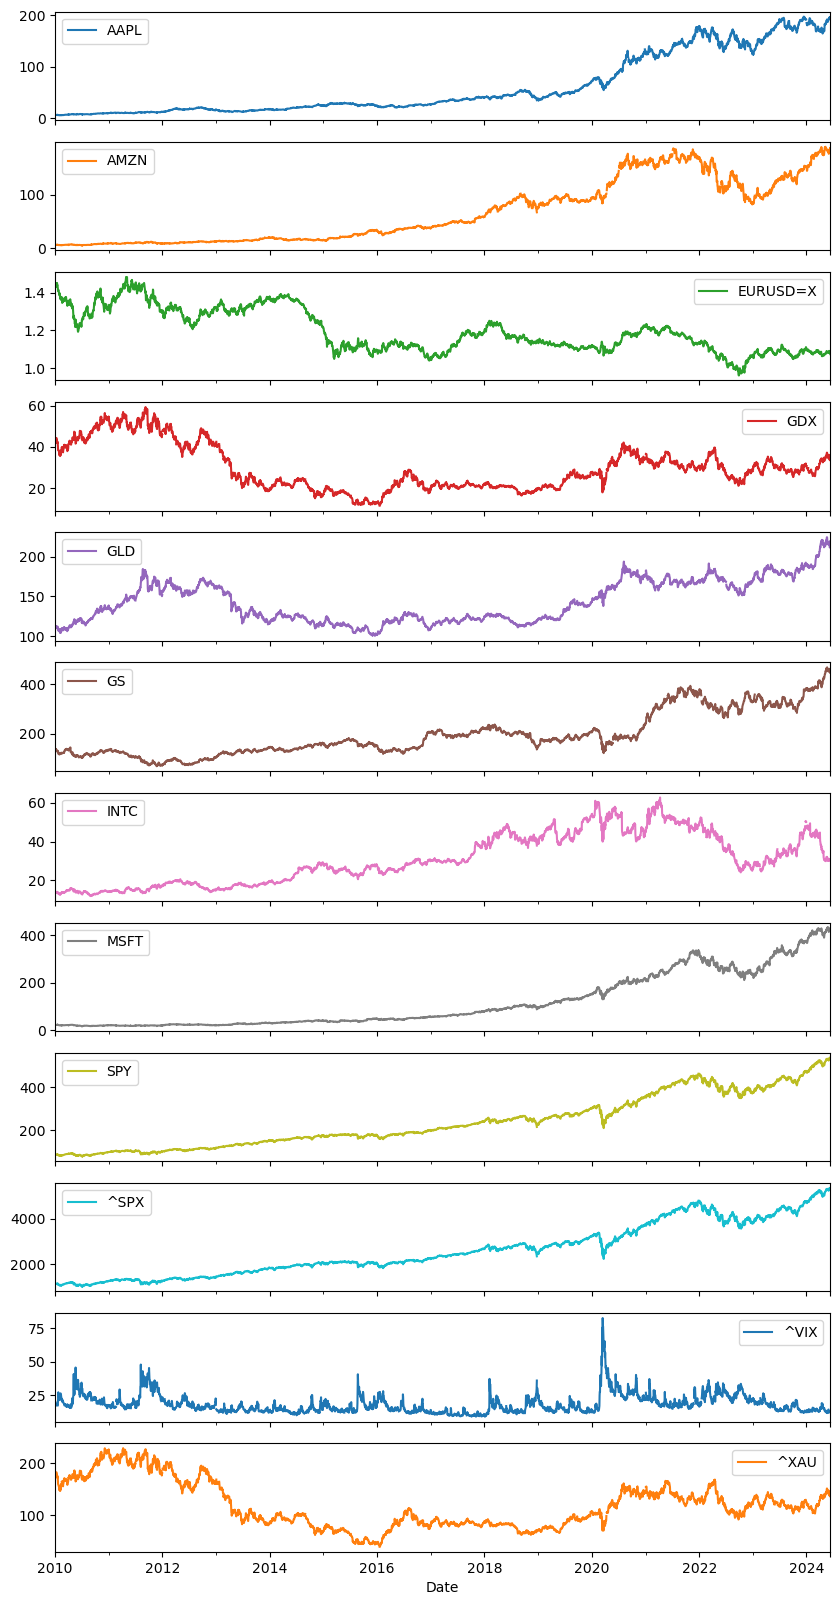

In [4]:
import matplotlib.pyplot as plt

# 데이터 시각화
# figsize: 데이터 크기 지정
# subplots: 여러 개이 하위 그래프(서브 플롯) 생성, 각 변수의 데이터를 개별적으로 시각화
f_df.plot(figsize=(10, 20), subplots=True)

plt.show()

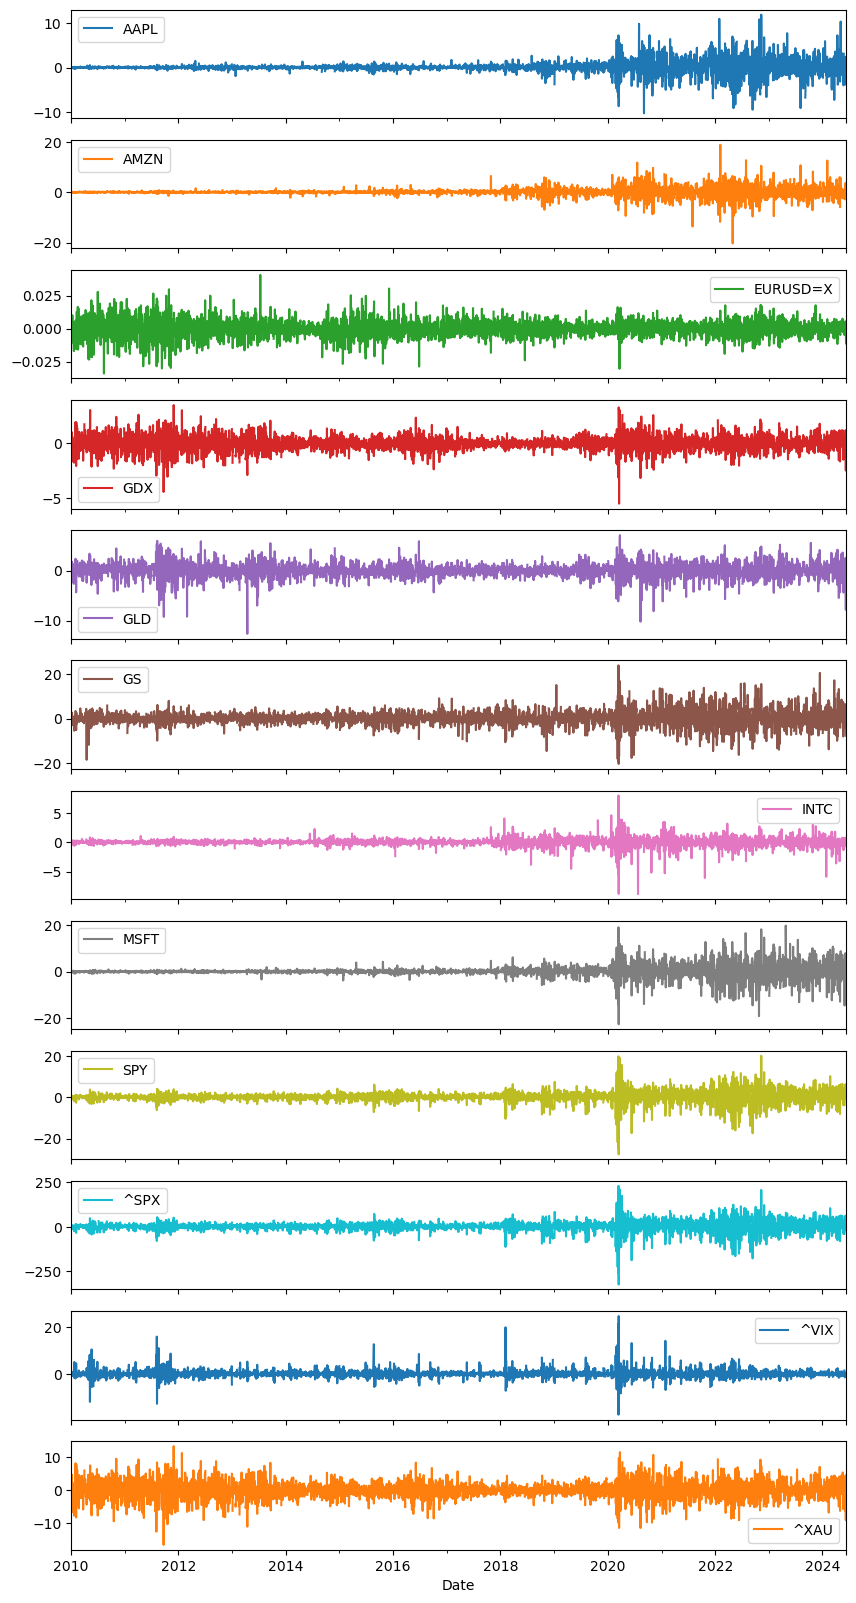

In [5]:
# 차분 후 데이터 시각화
f_df.diff().plot(figsize=(10, 20), subplots=True)
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11568\201146395.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))


<Axes: xlabel='Ticker'>

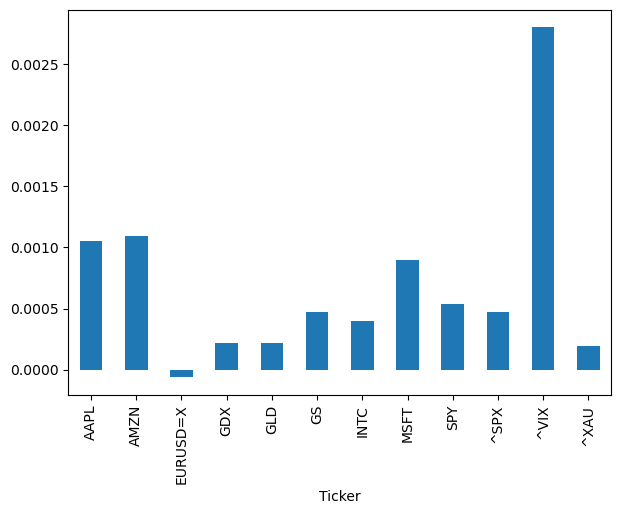

In [6]:
# 변화율 시각화
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

# 대기업의 변동율이 높다.
# ^VIX는 기본적으로 변동율이 높다.

In [7]:
# 수익율 계산을 위해 데이터 프레임 이동
# shift: 행 이동

# 데이터 프레임 한 칸 아래로 이동, 첫번째 행은 NaN으로 채워짐
display(f_df.shift(1).head(4))
# 원본 데이터 프레임
display(f_df.head(4))
# 데이터 프레임 한 칸 위로 이동, 마지막 행 NaN 값으로 채워짐
display(f_df.shift(-1).head(4))

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.4620,6.6950,1.4424,42.1804,109.8,134.7607,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-06,6.4731,6.7345,1.4366,42.5871,109.7,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.14,19.16,180.76


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-04,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-05,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-06,6.3584,6.5000,1.4318,43.4093,110.82,138.3345,13.4773,23.0116,87.5192,1141.6899,19.06,179.21


In [8]:
import numpy as np

# 수익률 계산 (실무용)
# 각 날짜의 주가를 전날 주가로 나눈 후 로그를 취해 수익률 계
# 로그를 취해 백분율로 변환
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001716,0.005883,-0.004029,0.009596,-0.000911,0.017525,-0.000476,0.000325,0.002643,0.003111,-0.035038,0.011427
2010-01-06,-0.016024,-0.018282,0.002642,0.023999,0.016365,-0.010731,-0.003360,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001854,-0.017160,-0.005988,-0.004876,-0.006207,0.019380,-0.009658,-0.010453,0.004213,0.003993,-0.005233,-0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,0.007791,0.010759,-0.002295,0.017689,0.011776,0.013915,0.024668,0.018904,0.011815,0.011778,-0.041107,0.015601
2024-06-06,-0.007122,0.020313,-0.000643,0.034467,0.007364,-0.007785,-0.011765,0.001202,-0.000019,-0.000200,-0.003967,0.031798
2024-06-07,0.012316,-0.003791,0.001746,-0.071058,-0.036336,-0.006988,0.010464,-0.001579,-0.001216,-0.001116,-0.029034,-0.065227


<Axes: xlabel='Date'>

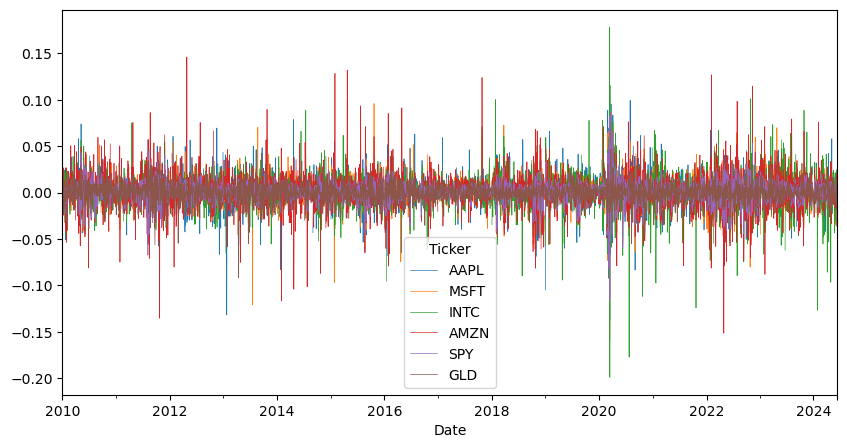

In [9]:
# 특정 데이터 수익률 시각화
# lw = line widht = 선 두께
rate_f_df[['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [10]:
# 연율화
# 연간 영업일(약 252일로 계산)
rate_f_df.mean() * 252

Ticker
AAPL        0.231637
AMZN        0.201635
EURUSD=X   -0.020521
GDX        -0.013077
GLD         0.038842
GS          0.094831
INTC        0.053286
MSFT        0.197030
SPY         0.128583
^SPX        0.110552
^VIX       -0.342685
^XAU       -0.013977
dtype: float64

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중 공산성 평가 지표 VIF 함수 선언
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [12]:
# NaN 값 제거 후 VIF 확인
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

# 서로 연관이 있다는 것을 확인할 수 있음 (마냥 독립적이지 않다.)
# 금융에서는 투자 수익률이나 가격 변동을 분석할 때 연율화를 진행
# 또, 서로 다른 자산 간의 상관관계를 파악하는 게 포트폴리오를 구성하거나 리스크를 관리하는데 중요하다.

,vif_score,feature
0,2.003973,AAPL
1,1.688423,AMZN
2,1.005266,EURUSD=X
3,23.014915,GDX
4,2.392765,GLD
5,2.326585,GS
6,1.759425,INTC
7,2.626567,MSFT
8,402.724551,SPY
9,401.683101,^SPX


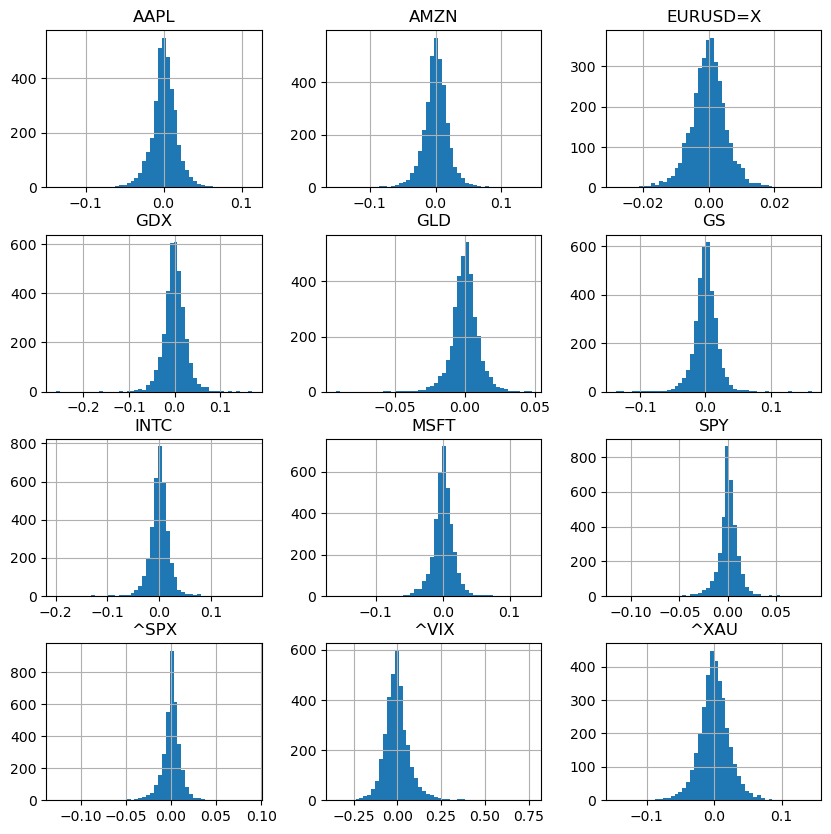

In [13]:
# 분포 시각화
rate_f_df.hist(figsize=(10, 10), bins=50)

plt.show()

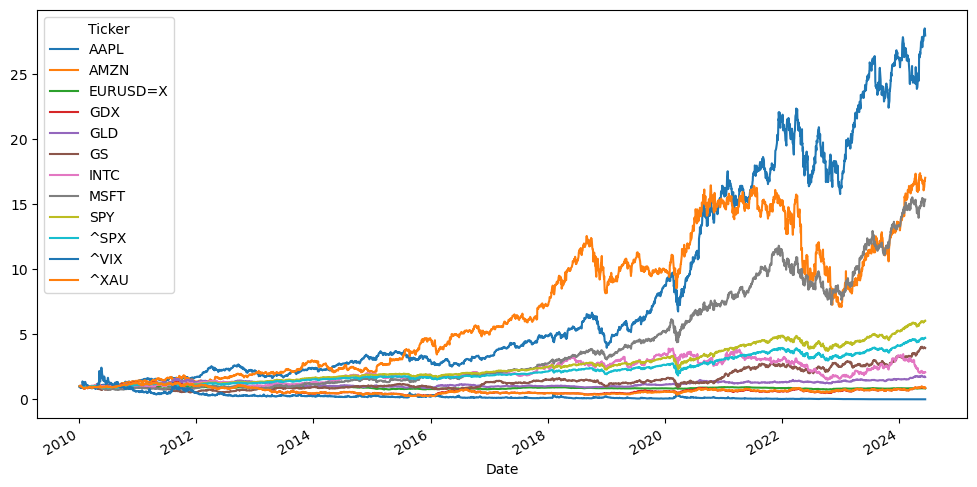

In [14]:
# 일간 수익률
# cumsum = 각 원소들의 누적합의 과정
# exp: 지수 (로그 후 지수 하면 원래 값을 얻을 수 있음)
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

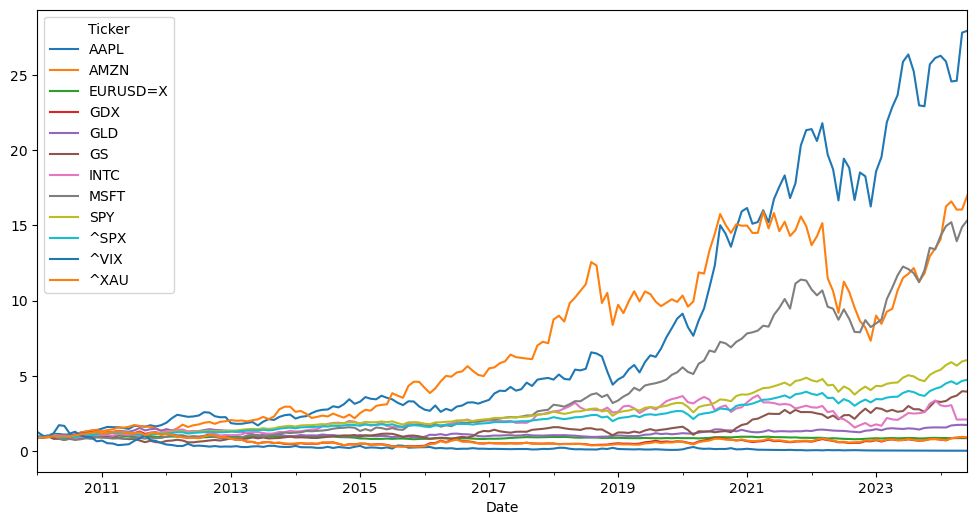

In [15]:
# 월간 수익률
# resample: 단위 리샘플링, 1m = 월 단위로 리샘플링
# last: 리샘플링된 그룹에서 가장 마지막 값을 선택 (월간은 가장 마지막 값이 필요)
# 즉, 각 월의 마지막 날에 해당하는 데이터 포인트를 선택
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [16]:
# Nan 값 제거
amzn_df = f_df[['AMZN']].dropna()
amzn_df

Ticker,AMZN
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760
...,...
2024-06-04,179.3400
2024-06-05,181.2800
2024-06-06,185.0000


In [17]:
# 윈도우 크기 지정
window = 20

# 이동평균 후 최솟값 계산
amzn_df['min'] = amzn_df['AMZN'].rolling(window=window).min()
# 이동평균 후 평균값 계산
amzn_df['mean'] = amzn_df['AMZN'].rolling(window=window).mean()
# 이동평균 후 표준편차값 계산
amzn_df['std'] = amzn_df['AMZN'].rolling(window=window).std()
# 이동평균 후 중앙값 계산
amzn_df['median'] = amzn_df['AMZN'].rolling(window=window).median()
# 이동평균 후 최댓값 계산
amzn_df['max'] = amzn_df['AMZN'].rolling(window=window).max()

# Nan 값 제거
amzn_df.dropna()

Ticker,AMZN,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.9435,5.9435,6.349775,0.236046,6.36225,6.7345
2010-02-02,5.9060,5.9060,6.310325,0.241189,6.34400,6.7345
2010-02-03,5.9550,5.9060,6.271350,0.231837,6.31625,6.6760
2010-02-04,5.7970,5.7970,6.230575,0.240240,6.29525,6.6760
2010-02-05,5.8695,5.7970,6.199050,0.244358,6.27975,6.6760
...,...,...,...,...,...,...
2024-06-04,179.3400,176.4400,183.546500,3.689442,183.34500,189.5000
2024-06-05,181.2800,176.4400,183.172500,3.507785,183.14000,189.5000
2024-06-06,185.0000,176.4400,183.022500,3.351132,183.14000,189.5000


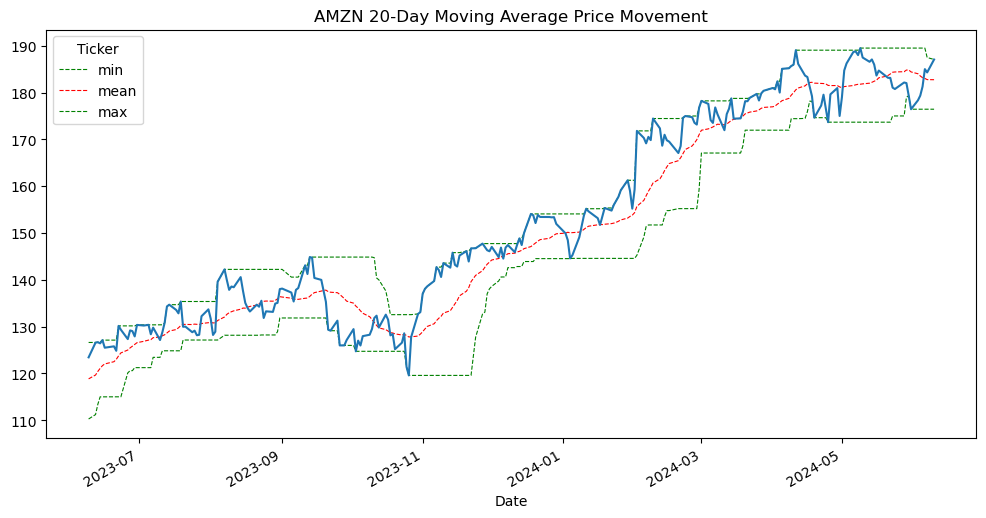

In [18]:
import matplotlib.pyplot as plt

# 최솟값, 평균값, 최댓값의 이동평균 시각화
# 마지막 252일의 데이터 시각화(1년 치)
# 최솟값, 최댓값 초록색 점선으로, 평균값은 빨간색으로 표기
ax = amzn_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
# AMZN의 마지막 252일의 원본 데이터도 함께 표기
amzn_df['AMZN'].iloc[-252:].plot(ax=ax)

plt.title("AMZN 20-Day Moving Average Price Movement")
plt.show()

In [19]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term (단기)
amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term (장기)
amzn_df[['AMZN', 'SMA1', 'SMA2']].tail()

Ticker,AMZN,SMA1,SMA2
Date,,,
2024-06-04,179.34,183.791905,151.816310
2024-06-05,181.28,183.438571,152.038452
2024-06-06,185.00,183.259524,152.270159
2024-06-07,184.30,183.083333,152.520437
2024-06-10,187.06,182.967143,152.769683


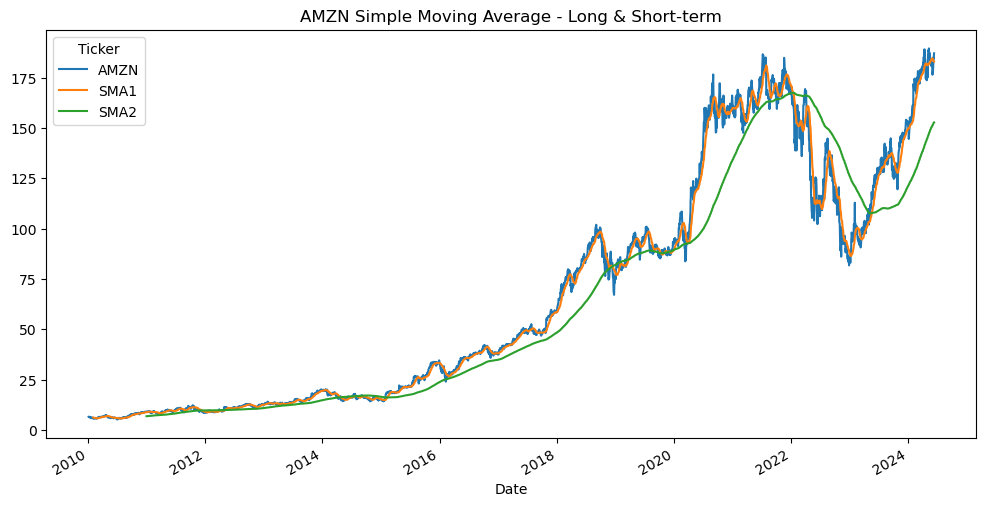

In [20]:
amzn_df[['AMZN', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AMZN Simple Moving Average - Long & Short-term")

plt.show()

# 단기가 장기에 비해 내려가면 적극 매도를 해야 하고
# 단기가 장기에 비해 올라가면 골든 크로스로 매수해야 한다.

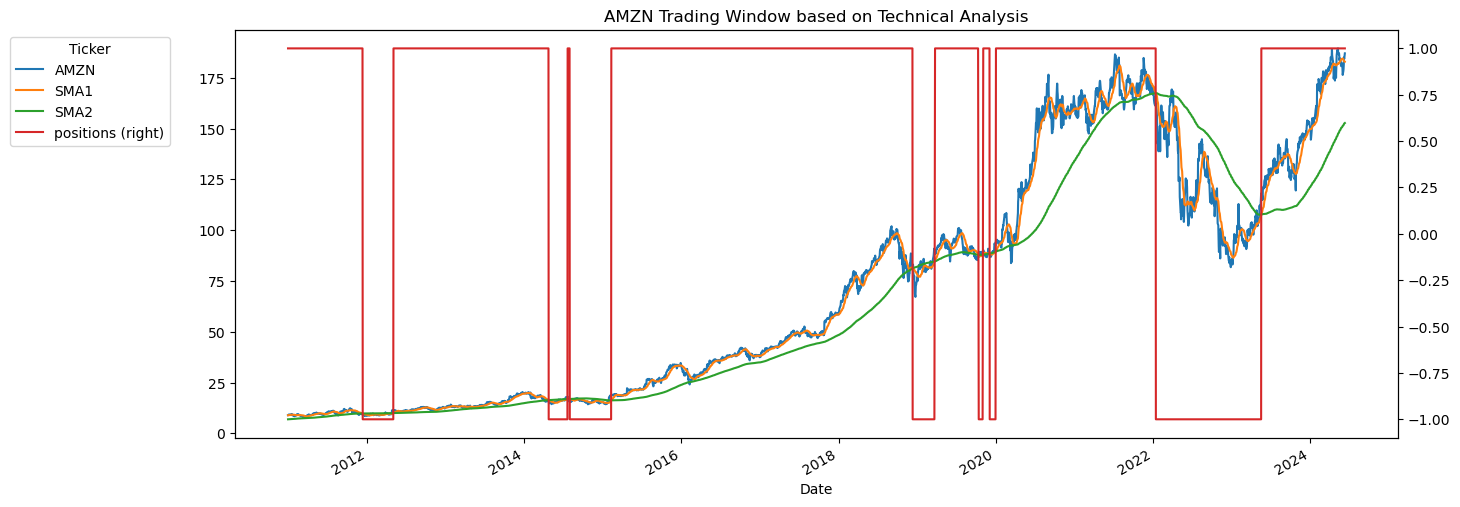

In [21]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스

# 데이터 NaN 값 제거
amzn_df.dropna(inplace=True)

# 거래 신호 결정 기준 데이터 후 새로운 컬럼으로 추가
# SMA1이 SMA2 보다 크면 1, 작으면 -1
amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

# 주식 가격, 이동평균, 거래 신호 데이터 시각화
# secondary_y: 보조 y축 지정 (오른쪽 표기)
ax = amzn_df[['AMZN', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
# 범례를 조정하여 그래프 우측 상단에 표시
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AMZN Trading Window based on Technical Analysis")
plt.show()